<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/vasco/niki_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [54]:
import scipy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import scipy.io
import os
from IPython.display import Audio

In [55]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal = '/content/drive/MyDrive/signal processing/males/'


fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([fem+x for x in os.listdir(mal)])

In [56]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data

<ipython-input-56-0ce80641c6ae>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data


In [57]:
maudios = np.array([wavfile.read(wav_fname)for wav_fname in mals]) # samplerate, data

FileNotFoundError: ignored

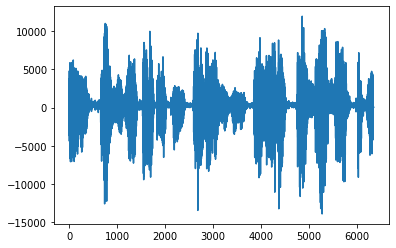

In [5]:
sns.lineplot(data = faudios[0][1][0::10])
Audio(fems[0])

In [6]:
fems[0]

'/content/drive/MyDrive/signal processing/females/5c9167fa-9dee-4d42-9cf3-a35d875f43a0.wav'

In [44]:
import scipy.stats as stats
from scipy.fft import fft, fftfreq

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','SKEW','P2P','CREST FACTOR','SKEW','KURTOSIS', 'FORM_FACTOR', 'PULSE_INDICATOR'
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

def features_extraction(df):

    df_features_list = []

    for i in range(len(df)):
      X = df[i][1]
      df_features = []
      
      Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
      FormFactor=[]; PulseIndicator=[];
      Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
      
      ## TIME DOMAIN ##

      df_features.append(np.min(X))
      df_features.append(np.max(X))
      df_features.append(np.mean(X))
      df_features.append(np.sqrt(np.mean(X**2)))
      df_features.append(np.var(X))
      df_features.append(np.std(X))
      df_features.append(np.mean(X**2))
      df_features.append(np.max(np.abs(X)))
      df_features.append(np.ptp(X))
      df_features.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      df_features.append(np.sqrt(np.mean(X**2))/np.mean(X))
      df_features.append(np.max(np.abs(X))/np.mean(X))

      ## FREQ DOMAIN ##
      ft = fft(X)
      S = np.abs(ft**2)/len(X)
      df_features.append(np.max(S))
      df_features.append(np.sum(S))
      df_features.append(np.mean(S))
      df_features.append(np.var(S))
      
      df_features.append(np.max(np.abs(S)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      #Create dataframe from features
      df_features_list.append(df_features)
    return df_features_list

In [46]:
features = features_extraction(faudios)
features_list = np.array(features)
df_features = pd.DataFrame(columns = [FEATURES], data = features_list)
df_features

<ipython-input-44-2479f41e911f>:24: RuntimeWarning: invalid value encountered in sqrt
  df_features.append(np.sqrt(np.mean(X**2)))
<ipython-input-44-2479f41e911f>:30: RuntimeWarning: invalid value encountered in sqrt
  df_features.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
<ipython-input-44-2479f41e911f>:33: RuntimeWarning: invalid value encountered in sqrt
  df_features.append(np.sqrt(np.mean(X**2))/np.mean(X))


,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,P2P,...,SKEW,KURTOSIS,FORM_FACTOR,PULSE_INDICATORMAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-16123.0,15465.0,320.680050,20.710955,7.858829e+06,2803.360280,428.943659,16123.0,31588.0,778.476896,...,2.845219,0.064584,50.277527,6.528833e+09,5.054702e+11,7.961665e+06,1.935003e+15,6.528833e+09,-0.526863,2.845219
1,-14698.0,17937.0,-0.179064,20.942302,9.765090e+06,3124.914415,438.579997,17937.0,32635.0,856.496117,...,1.885587,-116.954553,-100171.120739,1.330529e+09,7.199606e+11,9.765090e+06,1.625518e+15,1.330529e+09,0.279379,1.885587
2,-16472.0,16647.0,-22.028351,13.492133,3.372070e+07,5806.952883,182.037659,16647.0,-32417.0,1233.830095,...,0.906336,-0.612489,-755.707957,5.063516e+09,2.209952e+12,3.372119e+07,3.871885e+16,5.063516e+09,0.099421,0.906336
3,-6605.0,6709.0,0.044698,38.854798,9.970098e+05,998.503781,1509.695299,6709.0,13314.0,172.668510,...,2.251693,869.282889,150097.780927,1.159792e+09,7.554941e+10,9.970098e+05,1.320071e+14,1.159792e+09,0.279547,2.251693
4,-10511.0,13462.0,-1.804710,56.876268,4.969172e+05,704.923523,3234.909836,13462.0,23973.0,236.689230,...,44.490051,-31.515455,-7459.368783,4.748447e+07,8.701276e+10,4.969204e+05,3.027760e+12,4.748447e+07,1.368512,44.490051
5,-10360.0,20567.0,0.245923,39.594425,1.798671e+06,1341.145235,1567.718489,20567.0,30927.0,519.441816,...,12.636799,161.003068,83631.725908,2.203406e+08,3.167963e+11,1.798671e+06,4.837628e+13,2.203406e+08,0.534497,12.636799
6,-13088.0,21238.0,-0.244629,39.083837,3.951536e+06,1987.847043,1527.546340,21238.0,-31210.0,543.395978,...,6.953779,-159.767862,-86817.213573,4.278657e+08,3.398953e+11,3.951536e+06,1.989896e+14,4.278657e+08,0.653959,6.953779
7,-1682.0,1954.0,-0.229902,43.184739,2.749653e+05,524.371296,1864.921717,1954.0,3636.0,45.247465,...,-0.042075,-187.840007,-8499.284187,3.073380e+07,1.745700e+10,2.749653e+05,1.341567e+12,3.073380e+07,0.096500,-0.042075
8,-11307.0,12646.0,-0.209573,38.164540,2.869032e+06,1693.821843,1456.532110,12646.0,23953.0,331.354708,...,5.375098,-182.106275,-60341.771455,7.149284e+08,4.436213e+11,2.869032e+06,2.245863e+14,7.149284e+08,0.441655,5.375098
9,-9701.0,12755.0,0.040446,41.435555,1.613699e+06,1270.314578,1716.905246,12755.0,22456.0,307.827418,...,8.090608,1024.467010,315359.034205,1.979408e+08,1.189748e+11,1.613699e+06,3.696126e+13,1.979408e+08,0.166336,8.090608


In [48]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.signal import find_peaks

In [49]:
# Load data and sampling frequency from the data file

def get_pitch(path_list):

  pitch_df = []
  for i in path_list:
    data, sampling_frequency = librosa.load(i)

    # Get some useful statistics
    T = 1/sampling_frequency # Sampling period
    N = len(data) # Signal length in samples
    t = N / sampling_frequency # Signal length in seconds
    Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
    Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
    Pxx = np.abs(Y_k) # Power spectrum

    f = sampling_frequency * np.arange((N/2)) / N; # frequencies
    auto = sm.tsa.acf(data, nlags=2000)
    peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
    lag = peaks[0] # Choose the first peak as our pitch component lag
    pitch = sampling_frequency / lag # Transform lag into frequency
    pitch_df.append(pitch)

  return pitch_df

In [51]:
#This is the cell that takes a while
result = get_pitch(fems)

KeyboardInterrupt: ignored

In [59]:
label_fem = ['female'] * len(df_features)
df_features.insert(22, "Label", label_fem, True)
df_features.insert(21, "Pitch", result, True)
df_features

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,SKEW,P2P,...,PULSE_INDICATORMAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f,Pitch,Pitch,Label
0,-16123.0,15465.0,320.680050,20.710955,7.858829e+06,2803.360280,428.943659,16123.0,31588.0,778.476896,...,6.528833e+09,5.054702e+11,7.961665e+06,1.935003e+15,6.528833e+09,-0.526863,2.845219,787.500000,787.500000,female
1,-14698.0,17937.0,-0.179064,20.942302,9.765090e+06,3124.914415,438.579997,17937.0,32635.0,856.496117,...,1.330529e+09,7.199606e+11,9.765090e+06,1.625518e+15,1.330529e+09,0.279379,1.885587,595.945946,595.945946,female
2,-16472.0,16647.0,-22.028351,13.492133,3.372070e+07,5806.952883,182.037659,16647.0,-32417.0,1233.830095,...,5.063516e+09,2.209952e+12,3.372119e+07,3.871885e+16,5.063516e+09,0.099421,0.906336,760.344828,760.344828,female
3,-6605.0,6709.0,0.044698,38.854798,9.970098e+05,998.503781,1509.695299,6709.0,13314.0,172.668510,...,1.159792e+09,7.554941e+10,9.970098e+05,1.320071e+14,1.159792e+09,0.279547,2.251693,7350.000000,7350.000000,female
4,-10511.0,13462.0,-1.804710,56.876268,4.969172e+05,704.923523,3234.909836,13462.0,23973.0,236.689230,...,4.748447e+07,8.701276e+10,4.969204e+05,3.027760e+12,4.748447e+07,1.368512,44.490051,882.000000,882.000000,female
5,-10360.0,20567.0,0.245923,39.594425,1.798671e+06,1341.145235,1567.718489,20567.0,30927.0,519.441816,...,2.203406e+08,3.167963e+11,1.798671e+06,4.837628e+13,2.203406e+08,0.534497,12.636799,580.263158,580.263158,female
6,-13088.0,21238.0,-0.244629,39.083837,3.951536e+06,1987.847043,1527.546340,21238.0,-31210.0,543.395978,...,4.278657e+08,3.398953e+11,3.951536e+06,1.989896e+14,4.278657e+08,0.653959,6.953779,4410.000000,4410.000000,female
7,-1682.0,1954.0,-0.229902,43.184739,2.749653e+05,524.371296,1864.921717,1954.0,3636.0,45.247465,...,3.073380e+07,1.745700e+10,2.749653e+05,1.341567e+12,3.073380e+07,0.096500,-0.042075,612.500000,612.500000,female
8,-11307.0,12646.0,-0.209573,38.164540,2.869032e+06,1693.821843,1456.532110,12646.0,23953.0,331.354708,...,7.149284e+08,4.436213e+11,2.869032e+06,2.245863e+14,7.149284e+08,0.441655,5.375098,630.000000,630.000000,female
9,-9701.0,12755.0,0.040446,41.435555,1.613699e+06,1270.314578,1716.905246,12755.0,22456.0,307.827418,...,1.979408e+08,1.189748e+11,1.613699e+06,3.696126e+13,1.979408e+08,0.166336,8.090608,816.666667,816.666667,female
